# Introdução Machine Learning - Data ICMC-USP

## Tarefa Aula 02 - Introdução a EDA

Esse material foi desenvolvido pelo **Data**, grupo de extensão de aprendizado e ciência de dados compostos por alunos do Instituto de Ciências Matemáticas e de Computação da USP

Para saber mais sobre as atividades do Data entre no nosso site e nos siga e nossas redes sociais:
- [Site](http://data.icmc.usp.br/)
- [Twitter](https://twitter.com/data_icmc)
- [LinkedIn](https://www.linkedin.com/school/data-icmc/)
- [Facebook](https://www.facebook.com/dataICMC/)

Fonte dos dados utilizados:
https://www.kaggle.com/avikasliwal/used-cars-price-prediction

O objetivo dessa prática é demonstrar o uso de ferramentas do Python para EDA. 


Aproveite o material!

In [1]:
#importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lendo e Limpando os Dados

  Leia o dataset fornecido no formato Dataframe do Pandas. Os dados fornecem características de carros usados vendidos na Índia.

In [2]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Leia os dados de data.csv com pd.read_csv e guarde      #
# na variável df                                             #
##############################################################
df = pd.read_csv('data.csv')


##############################################################

df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
## A função sample pode ser uma alternativa ao head. 
## Ela pega uma amostra aleatória dos dados 
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5323,5323,Ford Endeavour 3.2 Titanium AT 4X4,Chennai,2017,17000,Diesel,Automatic,First,10.91 kmpl,3198 CC,197 bhp,7.0,NaN,31.0
5776,5776,Audi A4 2.0 TDI 177 Bhp Premium Plus,Chennai,2014,40000,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,22.0
4940,4940,Chevrolet Cruze LTZ,Hyderabad,2012,62005,Diesel,Manual,First,18.3 kmpl,1991 CC,147.9 bhp,5.0,NaN,9.8
5832,5832,Maruti Baleno Alpha 1.3,Jaipur,2015,98000,Diesel,Manual,First,27.39 kmpl,1248 CC,74 bhp,5.0,NaN,5.5
3959,3959,Maruti Celerio ZXI AT Optional,Pune,2016,64000,Petrol,Automatic,First,23.1 kmpl,998 CC,67.04 bhp,5.0,NaN,4.2


In [4]:
#podemos usar o dtypes para saber o tipo de variável que é armazenado em cada coluna
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

Observe as colunas e classifique cada coluna no tipo numérico ou categórico.

In [5]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - A coluna 'Unnamed: 0' é apenas um índice. Vamos         #
#    remove-la com o comando drop do pandas                  #
#                                                            #
#                                                            #
# OBS: Queremos dropar no sentido das colunas, usar axis=1   #
##############################################################
#seu código aqui
df = df.drop(columns = 'Unnamed: 0', axis = 1)

##############################################################

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission']

Os datasets dificilmente estão 100% limpos, com todos os seus valores preenchidos. Por isso é sempre importante checar quais colunas possuem valores nulos.

In [6]:
# O isnull() gera uma cópia do df com false onde nos valores
# não nulos e true onde tinham valores nulos, na pratica é uma tabela que diz onde tem valores nulos
null_table = df.isnull()
print(null_table)

       Name  Location   Year  Kilometers_Driven  Fuel_Type  Transmission  \
0     False     False  False              False      False         False   
1     False     False  False              False      False         False   
2     False     False  False              False      False         False   
3     False     False  False              False      False         False   
4     False     False  False              False      False         False   
...     ...       ...    ...                ...        ...           ...   
6014  False     False  False              False      False         False   
6015  False     False  False              False      False         False   
6016  False     False  False              False      False         False   
6017  False     False  False              False      False         False   
6018  False     False  False              False      False         False   

      Owner_Type  Mileage  Engine  Power  Seats  New_Price  Price  
0          False   

In [7]:
#agora usamos o sum() para facilitar a vizualização vamos obter a quantidade de nulos por coluna
print(null_table.sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


In [8]:
#podemos fazer em apenas uma linha
r, c = df.shape
print(r)
nullRows = df.New_Price.isnull().sum()


6019


 A coluna New_Price tem muitos valores nulos. Vamos checar o tamanho do dataset. 

In [9]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Encontre a razão entre o númrto de nulos na coluna      #
#    New_Price e o número de instâncias do dataset           #
#                                                            #
##############################################################

ratio = nullRows/r * 100

##############################################################

print(ratio, "%")

86.31001827546105 %


Quantos nulos são o suficiente para a exclusão de uma coluna? Essa resposta não é exata, e depende muito do contexto e do significado da feature. Nesse caso, como encontramos um ratio muito alto, vamos dropar a coluna New_Price, mas essa é sempre umas das questões que você deve pensar ao se trabalhar com um dataset.

In [10]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Drope a coluna New_Price                                #
#                                                            #
##############################################################

df = df.drop(columns = 'New_Price', axis = 1)


##############################################################
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


Quanto aos outros valores nulos, vamos apenas ignorá-los por hora por serem poucos valores e não serem o foco da prática. 

## Estatística Descritiva

In [11]:
# Exemplo função loc

#Selecionado o nome e o Preço dos 10 primeiros carros no dataset
#A primeira parte do loc é referente às linhas e a
#segunda parte é referente às colunas
df.loc[:10,['Name','Price']]

,Name,Price
0,Maruti Wagon R LXI CNG,1.75
1,Hyundai Creta 1.6 CRDi SX Option,12.50
2,Honda Jazz V,4.50
3,Maruti Ertiga VDI,6.00
4,Audi A4 New 2.0 TDI Multitronic,17.74
5,Hyundai EON LPG Era Plus Option,2.35
6,Nissan Micra Diesel XV,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,17.50
8,Volkswagen Vento Diesel Comfortline,5.20
9,Tata Indica Vista Quadrajet LS,1.95


In [12]:
#Acessando os carros com localização igual a Mumbai e ano maior que 2011

# a variavel isntances armazena uma Series do pandas que é uma lista de booleanos
# que é verdadeira para as instancias que atendem a condição,
# nesse caso o valor da coluna Location ser igual a Mumbai
mumbai_instances = ((df['Location'] == 'Mumbai') & (df['Year'] > 2011))

print(mumbai_instances)

df_mumbai = df.loc[mumbai_instances]
df_mumbai

0       False
1       False
2       False
3       False
4       False
        ...  
6014    False
6015    False
6016    False
6017    False
6018    False
Length: 6019, dtype: bool


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
22,Audi A6 2011-2015 35 TFSI Technology,Mumbai,2015,55985,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,23.50
25,Honda City Corporate Edition,Mumbai,2012,51920,Petrol,Manual,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,4.25
45,Toyota Corolla Altis G AT,Mumbai,2016,52001,Petrol,Automatic,First,14.28 kmpl,1798 CC,138.03 bhp,5.0,10.11
60,Toyota Innova Crysta 2.4 GX MT 8S,Mumbai,2017,22000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,8.0,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Maruti Baleno Alpha,Mumbai,2017,6000,Petrol,Manual,First,21.4 kmpl,1197 CC,83.1 bhp,5.0,7.50
5984,Mercedes-Benz New C-Class C 200 CGI Elegance,Mumbai,2012,63720,Petrol,Automatic,First,11.74 kmpl,1796 CC,186 bhp,5.0,13.25
5988,Renault Duster 85PS Diesel RxL Option,Mumbai,2013,102486,Diesel,Manual,First,19.87 kmpl,1461 CC,83.8 bhp,5.0,4.25
5993,Hyundai Elantra SX,Mumbai,2014,55619,Petrol,Manual,First,16.3 kmpl,1797 CC,147.5 bhp,5.0,8.30


In [13]:
# usando o exemplo anterior podemos fazer um slice

df_mumbai [50:55]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
479,Renault Duster 85PS Diesel RxL Option,Mumbai,2015,67000,Diesel,Manual,Second,19.87 kmpl,1461 CC,83.8 bhp,5.0,7.00
499,Honda Brio VX AT,Mumbai,2014,35000,Petrol,Automatic,First,16.5 kmpl,1198 CC,86.8 bhp,5.0,4.25
504,Ford Ecosport 1.5 DV5 MT Titanium Optional,Mumbai,2014,79000,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,6.25
507,Honda Mobilio S i VTEC,Mumbai,2015,25000,Petrol,Manual,Second,17.3 kmpl,1497 CC,117.3 bhp,7.0,4.25
508,Hyundai Grand i10 Sportz,Mumbai,2017,8500,Petrol,Manual,Second,18.9 kmpl,1197 CC,82 bhp,5.0,4.80


In [14]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Calcule o preço médio de um carro de 2014 que seja      #
#    manual e tenha no mínimo 5 assentos                     #
#                                                            #
#  - Dica: utilize a função mean() e utilize o operador      #
# and &                                                      # 
##############################################################

mean_instances = ((df['Year'] == 2014) & (df['Seats'] > 4))
df_mean = df.loc[mean_instances]
mean = df_mean['Price'].mean()
##############################################################

print(mean)

9.445480153649168


In [23]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Qual o tipo de combústivel mais utilizado de 2012 pra cá#          
#                                                            #
#  - Dica: utilize a função mode() e utilize o operador      #
# and &                                                      # 
##############################################################
fuel = (df['Year'] >= 2012)
df_fuel = df.loc[fuel]
mode = df_fuel['Fuel_Type'].mode()
#value_counts retorna a quantidade de cada valor

##############################################################

#mode

,Year,Kilometers_Driven,Seats,Price
count,4498.000000,4.498000e+03,4483.000000,4498.000000
mean,2014.862606,5.212234e+04,5.290431,10.973044
std,1.882181,1.021878e+05,0.797959,11.978054
min,2012.000000,1.710000e+02,0.000000,0.530000
25%,2013.000000,2.927700e+04,5.000000,4.357500
50%,2015.000000,4.698300e+04,5.000000,6.350000
75%,2016.000000,6.500000e+04,5.000000,12.000000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [26]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Utilize o método describe nos carros que estão com      #
#    o primeiro dono                                         #
#                                                            #
#                                                            # 
##############################################################

first = (df['Owner_Type'] == "First")
loc_first = df.loc[firstDono]
df_first = loc_first

#o método describe gera um pequeno resumo de algumas medidas de centralidade dos dados numéricos
df_first.describe()

##############################################################

,Year,Kilometers_Driven,Seats,Price
count,4929.000000,4.929000e+03,4905.000000,4929.000000
mean,2013.932441,5.536678e+04,5.277268,9.962445
std,2.924458,9.899439e+04,0.798259,11.415998
min,1998.000000,1.710000e+02,0.000000,0.500000
25%,2012.000000,3.105600e+04,5.000000,3.750000
50%,2014.000000,5.000000e+04,5.000000,5.910000
75%,2016.000000,6.900200e+04,5.000000,10.500000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [27]:

#OBS: 
#Na prática pra checar valores, se usa o método:

df[mumbai_instances].head()

#df[(condicao)] diretamente, a diferença entre loc e esse acesso direto é que o acesso direto tem alguns problemas
#como ambiguidade entre você receber uma cópia ou uma referência direta, geralmente se usa o loc
#por boa prática.





,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
22,Audi A6 2011-2015 35 TFSI Technology,Mumbai,2015,55985,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,23.50
25,Honda City Corporate Edition,Mumbai,2012,51920,Petrol,Manual,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,4.25
45,Toyota Corolla Altis G AT,Mumbai,2016,52001,Petrol,Automatic,First,14.28 kmpl,1798 CC,138.03 bhp,5.0,10.11
60,Toyota Innova Crysta 2.4 GX MT 8S,Mumbai,2017,22000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,8.0,16.50


## Gráficos

<AxesSubplot:>

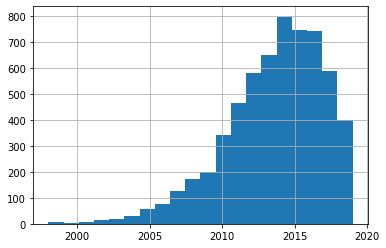

In [29]:
#plotando o histograma de carros por ano
#vamos utilizar o histograma do pandas primeiro


df['Year'].hist(bins = 20)

<AxesSubplot:xlabel='Year', ylabel='Count'>

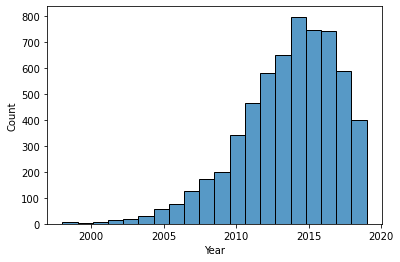

In [30]:
# Usaremos o seaborn que é uma biblioteca própria para visualização

# Para achar um plot específico basta googlar seaborn+<nome do plot>

sns.histplot(df['Year'],bins = 20)

<AxesSubplot:xlabel='Price', ylabel='Count'>

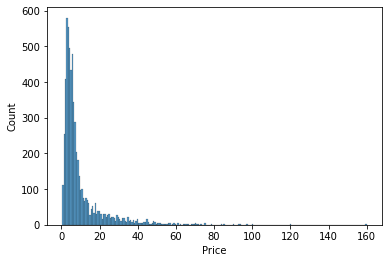

In [35]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Plote um histograma do preço                            #
#                                                            #
#                                                            # 
##############################################################

sns.histplot(df['Price'])

##############################################################

/home/frois/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

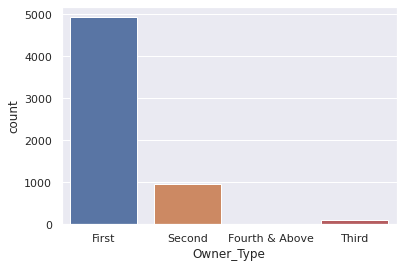

In [74]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Plote um barplot do tipo de dono                        #
#                                                            #
#  Dica: Busque por seaborn countplot                        # 
##############################################################
ownerTypes = list(set(df['Owner_Type'])).sort()

sns.set_theme(style="darkgrid")
sns.countplot(df['Owner_Type'], order = ownerTypes)

##############################################################

<AxesSubplot:>

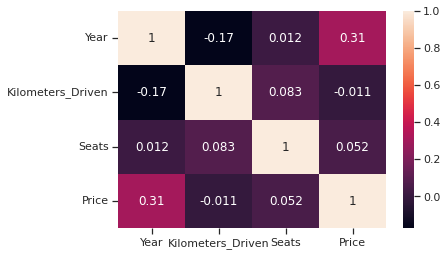

In [85]:
##############################################################
#                       PREENCHA AQUI:                       #
#   Faça um plot de uma matriz de correlação pearson,       #
#   troque o esquema de cores dela e coloque números nos     #
#   quadrados                                                #
#                                                            #
#  Dica: procure seaborn heatmap e veja os argumentos        #
#  da função                                                 # 
##############################################################

pearson_matrix = df.corr(method = 'pearson')
sns.set_theme(style="ticks")
sns.heatmap(pearson_matrix, annot = True)

##############################################################

<AxesSubplot:>

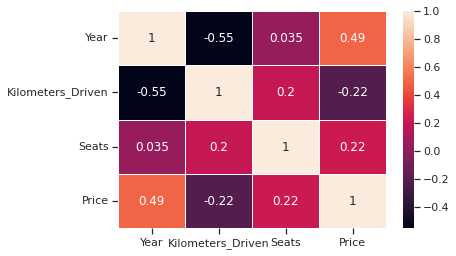

In [89]:
##############################################################
#                       PREENCHA AQUI:                       #
#     Faça o mesmo plot do anterior, só que com a            #
#     correlação spearman adicione linhas entre os quadrados #
##############################################################
spearman_matrix = df.corr(method = 'spearman')
sns.heatmap(spearman_matrix, annot = True, linewidths = 1)


##############################################################

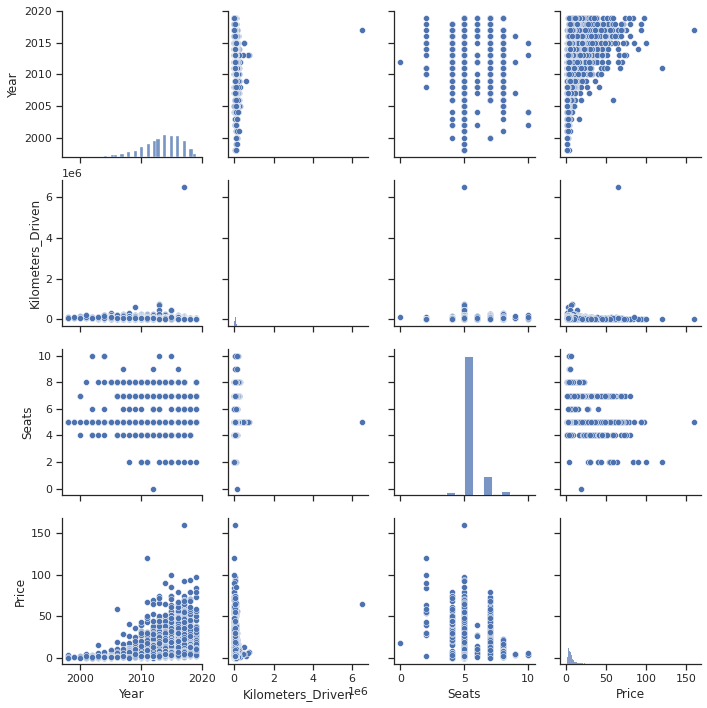

In [90]:
##############################################################
#                       PREENCHA AQUI:                       #
#  - Plote um pairplot do Dataset. O pairplot é              # 
#    basicamente um grid de scatterplot para cada feature    #
#    numérica                                                #
#                                                            #
#  Dica: Busque por seaborn pairplot                         # 
##############################################################

sns.pairplot(df)

##############################################################